In [188]:
%reset -f

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_columns",None) #show all columns

In [189]:
df_county1=pd.read_csv('silagecorn-county.csv')
#df_county1.drop(columns=['Province_number', 'County_number'])
#display(df_county1)

In [190]:
df_county2 = df_county1[['County','Region','growth_days','irrig_count','irrig_wat_m3ha','Ecwat'
                         , 'ETo_mm','elevation_m', 'yield_tonha' ]].copy()
display(df_county2)

,County,Region,growth_days,irrig_count,irrig_wat_m3ha,Ecwat,ETo_mm,elevation_m,yield_tonha
0,Karaj,NW,97.3,8.8,8754.5,0.4,580.0,1372.9,49.5
1,Hashtgerd,NW,97.0,14.5,6867.5,0.3,554.5,1612.9,55.0
2,EslamShahr,NW,96.2,9.0,6825.6,0.8,639.2,1162.9,51.9
3,Pakdasht,NW,100.7,8.0,5922.9,0.8,651.8,987.3,55.0
4,Shahrerey,NW,84.5,6.0,6134.0,1.7,592.9,1012.3,56.9
5,Abyek,NW,102.4,8.8,8692.6,2.7,581.8,1279.1,50.4
6,BoyeenZahra,NW,109.6,9.4,7308.8,3.1,763.3,1282.0,47.8
7,Moghan,NW,83.8,4.7,5868.3,1.1,421.7,96.6,32.8
8,Shahinshar,SW,103.3,18.0,8000.8,2.4,732.5,1715.3,58.2
9,Sepidan,SW,94.8,16.0,9088.5,2.3,587.8,1600.0,59.8


In [191]:
df_zone1=df_county2.groupby('Region').mean()
display(df_zone1)

,growth_days,irrig_count,irrig_wat_m3ha,Ecwat,ETo_mm,elevation_m,yield_tonha
Region,,,,,,,
NE,92.433333,16.633333,9695.366667,1.2000,782.633333,1015.70,76.066667
NW,96.437500,8.650000,7046.775000,1.3625,598.150000,1100.75,49.912500
SW,99.260000,16.200000,8068.380000,1.7600,602.220000,1063.96,55.680000


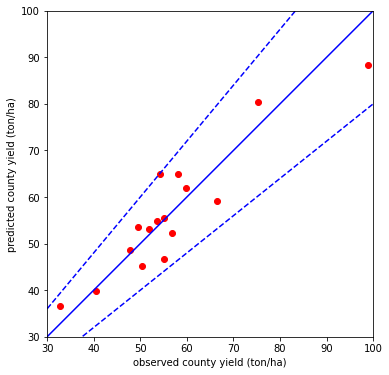

In [192]:
x = df_county2[['growth_days','irrig_count','irrig_wat_m3ha','Ecwat','ETo_mm','elevation_m']]
y = df_county2[["yield_tonha"]]

regressor_lin1 = LinearRegression()
regressor_lin1.fit(x, y)
y_hat_lin1 = regressor_lin1.predict(x)

fig = plt.figure()
ax = fig.add_subplot(111)

fig.set_size_inches(6, 6)

#plt.gca().set_aspect('equal') #equal aspect ratio

ax.scatter(y, y_hat_lin1, color = 'red')
ax.plot(np.array([0,100]),np.array([0,100]), 'b-')
ax.plot(np.array([100,0,100]),np.array([120,0,80]), 'b--')
ax.set_xlabel('observed county yield (ton/ha)')
ax.set_ylabel('predicted county yield (ton/ha)')
ax.set_xlim(left=30,right=100)
ax.set_ylim(bottom=30,top=100)
ax.set_aspect('equal')

fig.savefig('county_yield.png', dpi=300)
